# Import libraries

Explanation:

pandas: Used for data manipulation and analysis.

numpy: Provides support for arrays and matrices, along with mathematical functions.

matplotlib.pyplot: Used for creating static, animated, and interactive visualizations.

seaborn: Based on matplotlib, it provides a higher-level interface for drawing attractive statistical graphics.

scikit-learn (sklearn): A machine learning library featuring classification, regression, clustering algorithms, and more.

imblearn: Provides tools to deal with imbalanced datasets, such as over-sampling minority classes.

In [1]:
# Data manipulation and analysis
import pandas as pd  # Provides data structures and functions needed to manipulate structured data

# Numerical computing
import numpy as np  # Adds support for large, multi-dimensional arrays and matrices

# Data visualization
import matplotlib.pyplot as plt  # 2D plotting library for creating graphs and plots
import seaborn as sns  # Data visualization library based on matplotlib; provides a high-level interface

# Machine learning models and evaluation
from sklearn.model_selection import train_test_split  # Split arrays or matrices into random train and test subsets
from sklearn.preprocessing import StandardScaler  # Standardize features by removing the mean and scaling to unit variance
from sklearn.ensemble import RandomForestClassifier  # Ensemble of decision trees
from sklearn.metrics import classification_report, confusion_matrix  # Metrics to evaluate the model

# Handling imbalanced datasets
from imblearn.over_sampling import SMOTE  # Synthetic Minority Over-sampling Technique

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


Matplotlib is building the font cache; this may take a moment.


# Load the Dataset

Explanation:

pd.read_csv(): Reads a comma-separated values (CSV) file into a DataFrame.

df.head(): Displays the first five rows of the DataFrame to give an overview of the data.

In [3]:
# Load the dataset from a CSV file
df = pd.read_csv('C:/Users/nshrestha/Documents/personal_projects/diabetes_classification/data/diabetes_012_health_indicators_BRFSS2015.csv')  # Replace with your actual file path or name

# Display the first five rows of the dataset
df.head()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# Understand the Data

Explanation:

df.shape: Returns a tuple representing the dimensionality of the DataFrame.

df.info(): Provides a concise summary of the DataFrame.

df.isnull().sum(): Checks for missing values by summing up the number of nulls in each column.

In [4]:
# Get the shape of the dataset (number of rows and columns)
print("Dataset shape:", df.shape)

# Get information about the dataset (data types, non-null values)
df.info()

# Check for missing values in each column
print("Missing values in each column:")
print(df.isnull().sum())


Dataset shape: (253680, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               25

# Exploratory Data Analysis (EDA)

## Statistical Summary

In [ ]:
# Get statistical summary of the dataset
df.describe()

# TODO: Just go through each of the statistical summary and try to understand what it means. Also, explore how it affects the feature variable.

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## Explanation on above statistical distribution

## Class Distribution

Explanation:

sns.countplot(): Shows the counts of observations in each categorical bin using bars.


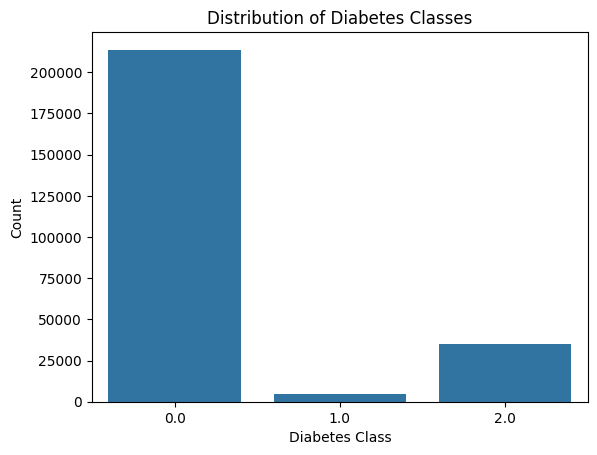

In [7]:
# Visualize the distribution of the target variable
sns.countplot(x='Diabetes_012', data=df)
plt.title('Distribution of Diabetes Classes')
plt.xlabel('Diabetes Class')
plt.ylabel('Count')
plt.show()

# TODO: Try to understand what this graph is saying about the data you have and write it down in findings


## Explanation for the above graph

## Check for Class Imbalance

Class distribution:
Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64


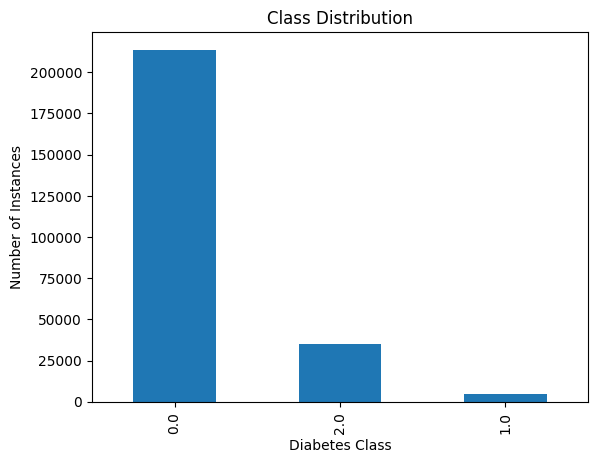

In [8]:
# Calculate the number of instances in each class
class_counts = df['Diabetes_012'].value_counts()
print("Class distribution:")
print(class_counts)

# Plot the class distribution
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Diabetes Class')
plt.ylabel('Number of Instances')
plt.show()

## Correlation Matrix

Explanation:

df.corr(): Calculates the pairwise correlation of columns.

sns.heatmap(): Visualizes the correlation matrix with color-coded cells.

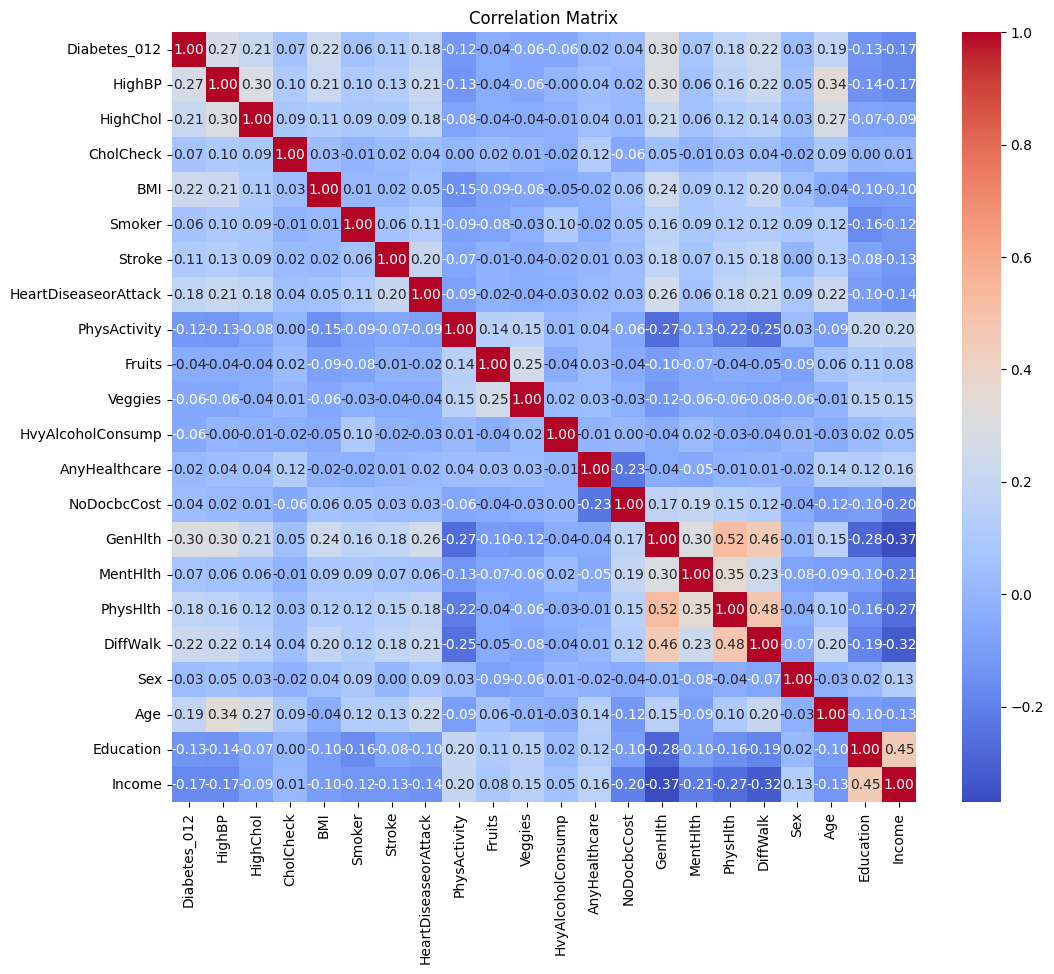

In [ ]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# TODO: Provide what you understand from the correlation plot below. Based on this, try to come up which variable might be important and ignored for the final classificaiton task.


## Explanation for above visualization